In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numba
import numpy as np
import seaborn as sns

from pysde import increments, integrator, schemes, storages

numba.config.DISABLE_JIT = False
sns.set_theme(style="ticks")

In [2]:
def drift(x, t):
    return -2 * np.power(x, 3) + 3 * x


def diffusion(x, t):
    return np.sqrt(np.power(x, 2) + 2)

In [3]:
rng = np.random.default_rng(seed=0)
x0 = rng.normal(loc=0, scale=0.5, size=(1, 100000)).astype(np.float32)
t0 = 0.0
dt = 0.01
num_steps = 101

In [5]:
storage = storages.NumpyStorage(stride=10, save_directory=Path("../results_example_serial/result"))
brownian_increment = increments.BrownianIncrement(seed=1)
scheme = schemes.ExplicitEulerMaruyamaScheme(drift, diffusion, brownian_increment)
sde_integrator = integrator.SDEIntegrator(scheme, storage)

In [6]:
storage = sde_integrator.run(
    initial_state=x0, initial_time=t0, step_size=dt, num_steps=num_steps, progress_bar=True
)

100%|██████████| 101/101 [00:01<00:00, 71.51it/s]


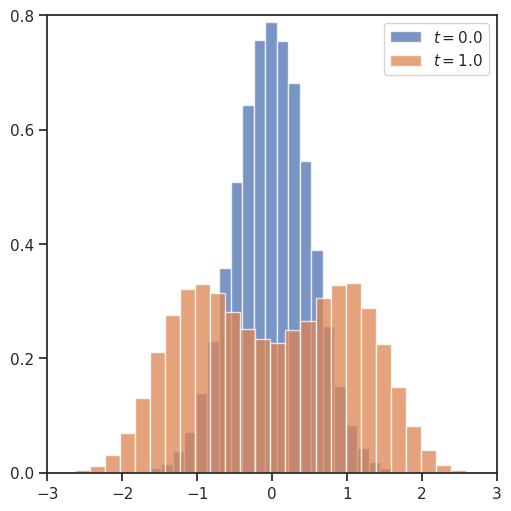

In [7]:
times, data = storage.values
_, ax = plt.subplots(figsize=(5, 5), layout="constrained")
ax.hist(data[0, :, 0], bins=30, density=True, alpha=0.75, label=rf"$t={times[0]:.1f}$")
ax.hist(data[0, :, -1], bins=30, density=True, alpha=0.75, label=rf"$t={times[-1]:.1f}$")
ax.set_xlim((-3, 3))
ax.set_ylim((0, 0.8))
ax.set_yticks((0, 0.2, 0.4, 0.6, 0.8))
ax.legend()